# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 5000

# Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
X_test.shape

(1724, 5000)

In [5]:
y_test.shape

(1724,)

# Calculating Joint Probability
## Dot Product

In [6]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
print('a =', a)
print('b =', b)

a = [1 2 3]
b = [0 5 4]


In [7]:
a.dot(b)

22

In [8]:
1*0 + 2*5 + 3*4

22

In [9]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('Shape of c is:', c.shape)
print(c)

Shape of c is: (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [10]:
print(a.dot(c))
print('Shape of dot product is:', a.dot(c).shape)

[21  9]
Shape of dot product is: (2,)


In [11]:
[1*0 + 2*3 + 3*5, 1*6 + 2*0 + 3*1]

[21, 9]

In [12]:
X_test.shape

(1724, 5000)

In [13]:
prob_token_spam.shape

(5000,)

In [14]:
print('Shape of dot product:', X_test.dot(prob_token_spam).shape)

Shape of dot product: (1724,)


## Set the Prior
$$ P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)}{P(X)}$$

In [15]:
PROB_SPAM = 0.310989

In [16]:
np.log(prob_token_spam)

array([ -4.49467182,  -5.34074662,  -5.07714906, ..., -12.18129315,
       -12.18129315,  -9.87870806])

## Joint probability in log format

In [17]:
joint_log_spam = X_test.dot(np.log(prob_token_spam+0.0000000001) - np.log(prob_all_tokens+0.0000000001)) + np.log(PROB_SPAM)

In [18]:
joint_log_spam

array([  24.59443455,    4.64811053,   21.34406183, ..., -444.59524204,
        -11.0654936 , -124.71016846])

$$ P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, (1 - P(Spam))}{P(X)}$$

In [19]:
joint_log_ham = X_test.dot(np.log(prob_token_ham+0.0000000001) - np.log(prob_all_tokens+0.0000000001)) + np.log(1 - PROB_SPAM)

In [20]:
joint_log_ham

array([-64.89228824, -15.35962211, -39.28907925, ...,  85.84205787,
         0.16266124,  32.04101151])

In [21]:
joint_log_ham.size

1724

# Making Predictions
### Checking for Higher Joint Probability
$$ P(Spam \, | \, X) \, > \, P(Ham \, | \, x) $$
**<center>OR</center>**

$$ P(Spam \, | \, X) \, < \, P(Ham \, | \, x) $$

In [22]:
prediction = joint_log_spam > joint_log_ham

In [23]:
prediction * 1

array([1, 1, 1, ..., 0, 0, 0])

In [24]:
y_test

array([1., 1., 1., ..., 0., 0., 0.])

### Simplify

In [25]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

# Metrix and Evaluation
## Accuracy

In [26]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly:', correct_docs)
num_docs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly:', num_docs_wrong)

Docs classified correctly: 1687
Docs classified incorrectly: 37


In [27]:
# Accuracy
correct_docs/len(X_test)

0.978538283062645

In [28]:
fraction_worng = num_docs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_worng))
print('Accuracy of the model is {:.2%}'.format(1 - fraction_worng))

Fraction classified incorrectly is 2.15%
Accuracy of the model is 97.85%


## Visualising the Results

In [29]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | NonSpam)'

linedata = np.linspace(start=-40000, stop=1, num=1000)

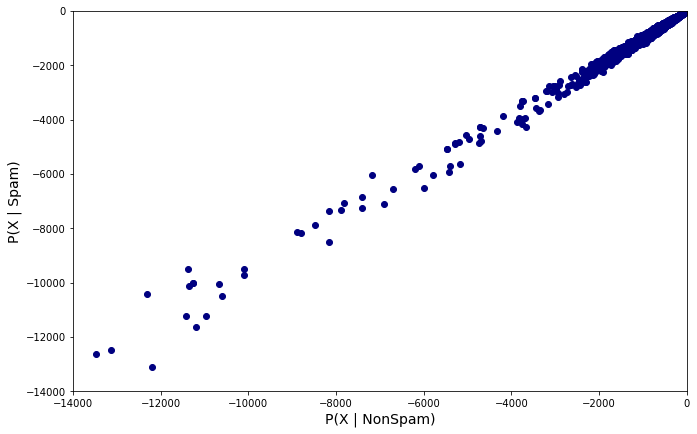

In [30]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')

plt.show()

## The Decision Boundary

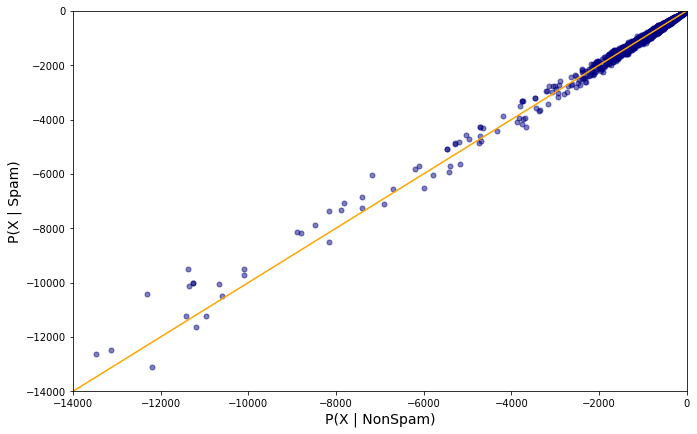

In [31]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

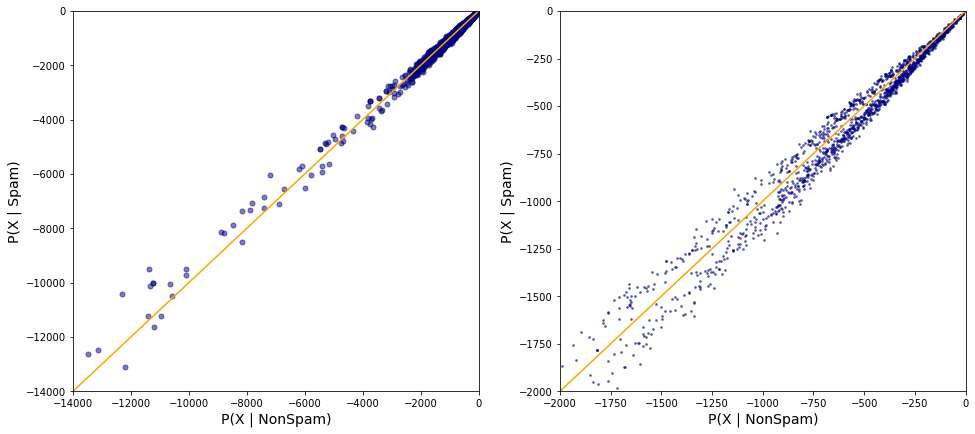

In [32]:
plt.figure(figsize=(16, 7))

# Chart 1
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart 2
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [33]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

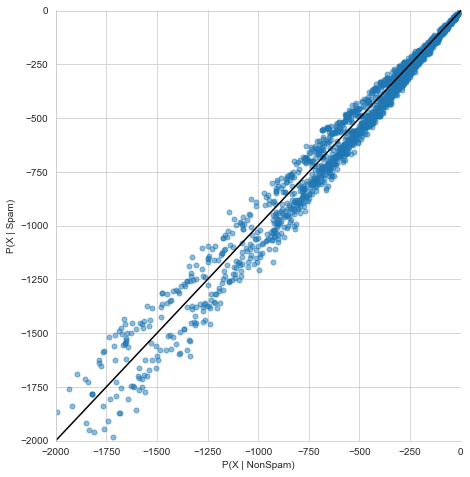

In [34]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.show()

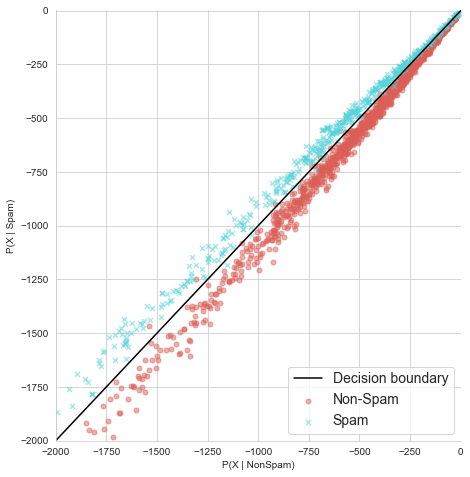

In [35]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls', legend=False)

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision boundary', 'Non-Spam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

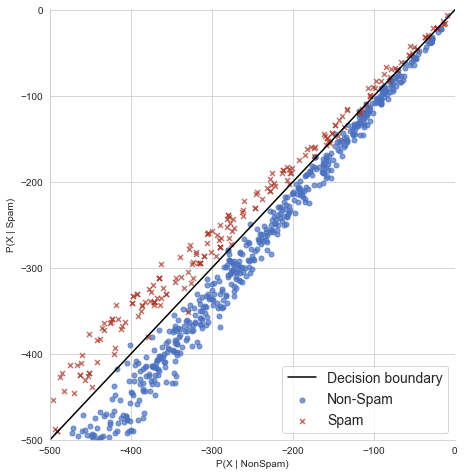

In [36]:
my_colors = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colors, legend=False)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision boundary', 'Non-Spam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

In [37]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1132,  592], dtype=int64))

In [38]:
true_pos = (y_test == 1) & (prediction == 1)
true_pos.sum()

572

In [39]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

20

In [40]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

17

## Recall Score

In [41]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall Score is {:.2%}'.format(recall_score))

Recall Score is 97.11%


## Precision Score

In [42]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision Score is {:.3}'.format(precision_score))

Precision Score is 0.966


## F-Score or F1 Score
Harmonic mean of precision and recall scores

In [43]:
f1_score = 2 * ((precision_score * recall_score) / (precision_score + recall_score))
print('F-Score is {:.2}'.format(f1_score))

F-Score is 0.97
